# Plots for var decomp

In [1]:
import nibabel as nb 
import numpy
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
from Functional_Fusion.dataset import decompose_pattern_into_group_indiv_noise
from scripts import decomposing_variances
#from scripts import bold_normalization 

print(decomposing_variances.__file__)

/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_16427/960356757.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


/Users/incehusain/Documents/GitHub/Pontine7T/scripts/decomposing_variances.py


In [170]:
#choose BOLD or SUIT directory 

data_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group'
 
 #appending files: 10 conditions, 16 runs; converting to tensor subj x cond x voxels


In [172]:
#pontine data

    #obtaining data in form subj x rep x cond x voxel

flat_data = decomposing_variances.get_structure_data(structure='pontine', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d) #replaces NaNs with zeros 

    #removing instruction from data without nans

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_p = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_p.shape)


    #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity of all voxels  

tensor_mean_subtract_p = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subtract_p).any()

    #removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_p = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_p.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_p = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_p.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(tensor_mean_subtract_p.shape)

vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=137064) not divisible by 16, not SPM compatible; leaving at curren

(16, 16, 9, 13220)
tensor_subtract does not contain NaN values.
(16, 160, 13220)
(16, 16, 10, 13220)


In [173]:
#dentate data

flat_data = decomposing_variances.get_structure_data(structure='dentate', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

    #removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_d = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_d.shape)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_d = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subtract_d).any()

 #removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_d = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_d.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_d = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_d.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(tensor_mean_subtr_no_inst_d.shape)

vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=39544) not divisible by 16, not SPM compatible; leaving at current value
v

(16, 16, 9, 2385)
tensor_subtract does not contain NaN values.
(16, 160, 2385)
(16, 16, 9, 2385)


In [178]:
#cerebellum data

flat_data = decomposing_variances.get_structure_data(structure='cerebellum_gray',  data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

 #removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_c = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_c.shape)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_c = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subtract_c).any()

 #removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_c = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_c.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_c = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_c.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(tensor_mean_subtr_no_inst_c.shape)

vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=1.52516e+06) not divisible

(16, 16, 9, 164231)
tensor_subtract does not contain NaN values.
(16, 160, 164231)
(16, 16, 9, 164231)


In [175]:
#rednucleus data

flat_data = decomposing_variances.get_structure_data(structure='rednucleus', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

#removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_r = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_r.shape)

#removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subtract_r = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subtract_r).any()

#removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_r = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_r.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_r = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_r.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(tensor_mean_subtr_no_inst_r.shape)

vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
v

(16, 16, 9, 390)
tensor_subtract does not contain NaN values.
(16, 160, 390)
(16, 16, 9, 390)


In [176]:
#inferior olive data

flat_data = decomposing_variances.get_structure_data(structure='olive', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

#removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_o = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_o.shape)

#removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity across all voxels 

tensor_mean_subtract_o = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subtract_o).any()

#removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_o = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_o.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_o = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_o.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(tensor_mean_subtr_no_inst_o.shape)

vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=32168) not divisible by 16, not SPM compatible; leaving at current value
v

(16, 16, 9, 1565)
tensor_subtract does not contain NaN values.
(16, 160, 1565)
(16, 16, 9, 1565)


In [179]:
#data shapes for all structures to put into var decomp

print(tensor_mean_subtract_o.shape)
print(tensor_mean_subtract_c.shape)
print(tensor_mean_subtract_d.shape)
print(tensor_mean_subtract_p.shape)
print(tensor_mean_subtract_r.shape)

print(tensor_mean_subtract_o[0].shape)




(16, 16, 10, 1565)
(16, 16, 10, 164231)
(16, 16, 10, 2385)
(16, 16, 10, 13220)
(16, 16, 10, 390)
(16, 10, 1565)


In [197]:
# Example arrays representing variances for each subject

#options are: global, subject_wise, condition_wise

variances_d_no_inst= decompose_pattern_into_group_indiv_noise(tensor_mean_subtr_no_inst_d, criterion='global')
variances_p_no_inst= decompose_pattern_into_group_indiv_noise(tensor_mean_subtr_no_inst_p, criterion='global')
variances_c_no_inst= decompose_pattern_into_group_indiv_noise(tensor_mean_subtr_no_inst_c, criterion='global')
variances_r_no_inst= decompose_pattern_into_group_indiv_noise(tensor_mean_subtr_no_inst_r, criterion='global')
variances_o_no_inst= decompose_pattern_into_group_indiv_noise(tensor_mean_subtr_no_inst_o, criterion='global')

variances_d= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_d, criterion='subject_wise')
variances_p= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_p, criterion='subject_wise')
variances_c= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_c, criterion='subject_wise')
variances_r= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_r, criterion='subject_wise')
variances_o= decompose_pattern_into_group_indiv_noise(tensor_mean_subtract_o, criterion='subject_wise')

#var_diff_d = variances_d_no_inst - variances_d
#var_diff_p = variances_p_no_inst - variances_p
#var_diff_c = variances_c_no_inst - variances_c
#var_diff_r = variances_r_no_inst - variances_r
#var_diff_o = variances_o_no_inst - variances_o





In [198]:
import pandas as pd

# Assuming variances_d, variances_p, variances_o, variances_r are defined

var_d_normalized = numpy.zeros((16,3)) #(10,3) means 10 rows, 3 variances; (1,3) means 1 row, 3 variances, etc 
var_p_normalized = numpy.zeros((16,3))
var_c_normalized = numpy.zeros((16,3))
var_o_normalized = numpy.zeros((16,3))
var_r_normalized = numpy.zeros((16,3)) 

print(var_d_normalized.shape) 

for i in range(16): #number of rows 
    row_sum_d = numpy.sum(variances_d[i])
    var_d_normalized[i] = variances_d[i]/row_sum_d

    row_sum_r = numpy.sum(variances_r[i])
    var_r_normalized[i] = variances_r[i]/row_sum_r

    row_sum_p = numpy.sum(variances_p[i])
    var_p_normalized[i] = variances_p[i]/ row_sum_p

    row_sum_o = numpy.sum(variances_o[i])
    var_o_normalized[i] = variances_o[i]/ row_sum_o

    row_sum_c = numpy.sum(variances_c[i])
    var_c_normalized[i] = variances_c[i]/ row_sum_c

print(var_o_normalized[0][0] + var_o_normalized[0][1] + var_o_normalized[0][2])

print(var_r_normalized)


(16, 3)
1.0
[[-8.56308353e-05  3.00167991e-02  9.70068832e-01]
 [ 1.62966797e-04 -4.80848207e-03  1.00464552e+00]
 [ 1.67831492e-03  2.97842427e-03  9.95343261e-01]
 [-1.70172976e-04  7.45442076e-03  9.92715752e-01]
 [ 4.58981360e-04  1.50130224e-02  9.84527996e-01]
 [ 9.54041166e-04  5.17161890e-03  9.93874340e-01]
 [ 1.08952931e-03  4.25832884e-03  9.94652142e-01]
 [ 4.43102734e-04 -5.60484488e-03  1.00516174e+00]
 [-5.77804552e-05 -2.22888507e-03  1.00228667e+00]
 [ 4.84980243e-04  2.03385503e-02  9.79176469e-01]
 [-1.05537825e-03 -2.46868608e-03  1.00352406e+00]
 [ 8.98117600e-04  2.21042150e-02  9.76997667e-01]
 [ 3.71578608e-04 -7.08257813e-03  1.00671100e+00]
 [-2.49184967e-04  2.70489996e-02  9.73200185e-01]
 [-2.00579543e-03  3.34074231e-02  9.68598372e-01]
 [-2.11579918e-04 -1.45088234e-04  1.00035667e+00]]


(16, 3)
(16, 3)
(16, 3)
(16, 3)
(16, 3)


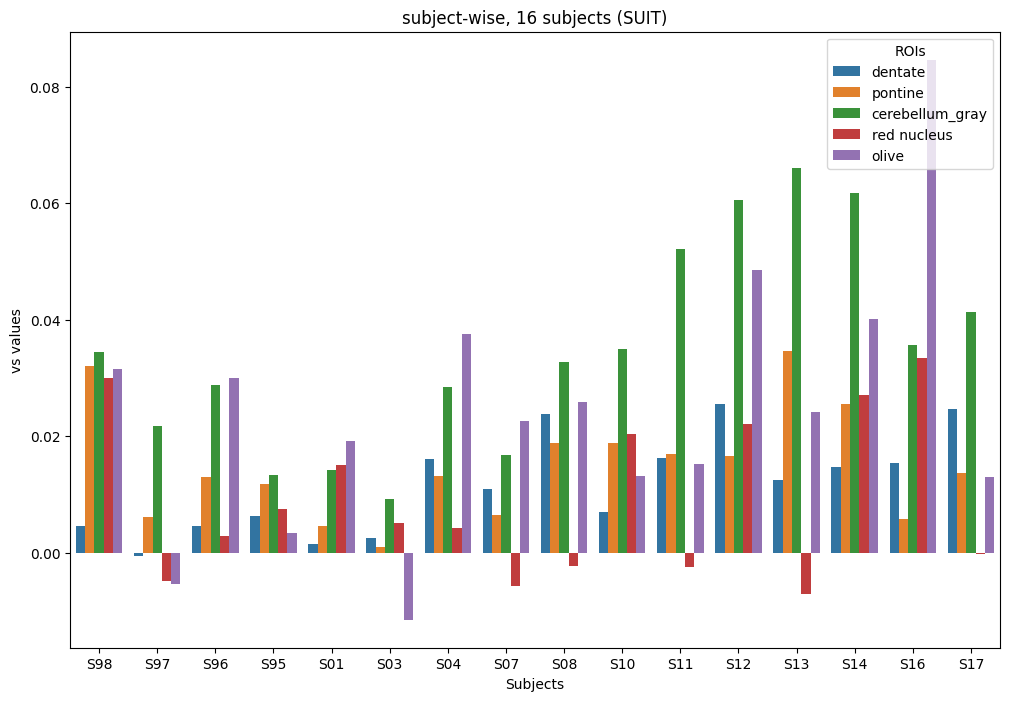

In [200]:
# plot variances per roi (each variance separately: vg (0), vs (1), ve(2)), mean subtracted, for condition or for subject 
data = {
    'Subjects': ['S98', 'S97', 'S96', 'S95', 'S01', 'S03','S04','S07','S08','S10', 'S11', 'S12', 'S13', 'S14', 'S16', 'S17'],
    #'conditions': ["Inst", "Vis_S", "Act_Obs", "Flex_Ext", "F_Seq", "ToM", "N_back", "Sem_Pred", "Rest", "Rom_Movie"],
    'dentate': var_d_normalized[:,1],
    'pontine': var_p_normalized[:,1],
    'cerebellum_gray': var_c_normalized[:,1],
    'red nucleus': var_r_normalized[:,1],
    'olive': var_o_normalized[:,1]
}

print(var_o_normalized.shape)
print(var_d_normalized.shape)
print(var_c_normalized.shape)
print(var_p_normalized.shape)
print(var_r_normalized.shape)

df = pandas.DataFrame(data)

#seaborn process 
df_melted = pandas.melt(df, id_vars=['Subjects'], var_name='Variance', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Subjects', y='Value', hue='Variance', data=df_melted)
plt.xlabel('Subjects')
plt.ylabel('vs values')
plt.title('subject-wise, 16 subjects (SUIT)')
plt.legend(title='ROIs', loc='upper right')
plt.show()

In [26]:
#Plot subject-wise variance per ROI

#plot

data_to_plot = (variances_p[:,0:2])

df = pandas.DataFrame(data_to_plot, columns=['vg', 'vs'], 
                  index=['S_98', 'S_97', 'S_96', 'S_95', 'S_1', 'S_3', 'S_4', 'S_7'])

df_melted = df.reset_index().melt(id_vars='index', var_name='Variances', value_name='Values')
df_melted = df_melted.rename(columns={'index': 'Subjects'})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x='Subjects', y='Values', hue='Variances', data=df_melted, 
            palette=['blue', 'red', 'green'], hue_order=['vg', 'vs'], errorbar='sd')


# Set plot title and labels
plt.title("vg, vs subject-wise pontine")
plt.xlabel("Subjects")
plt.ylabel("Values")

# Show the legend
plt.legend(title='Variances')

# Show the plot
plt.show()

print(variances_p)


ValueError: Shape of passed values is (1, 2), indices imply (8, 2)

(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)


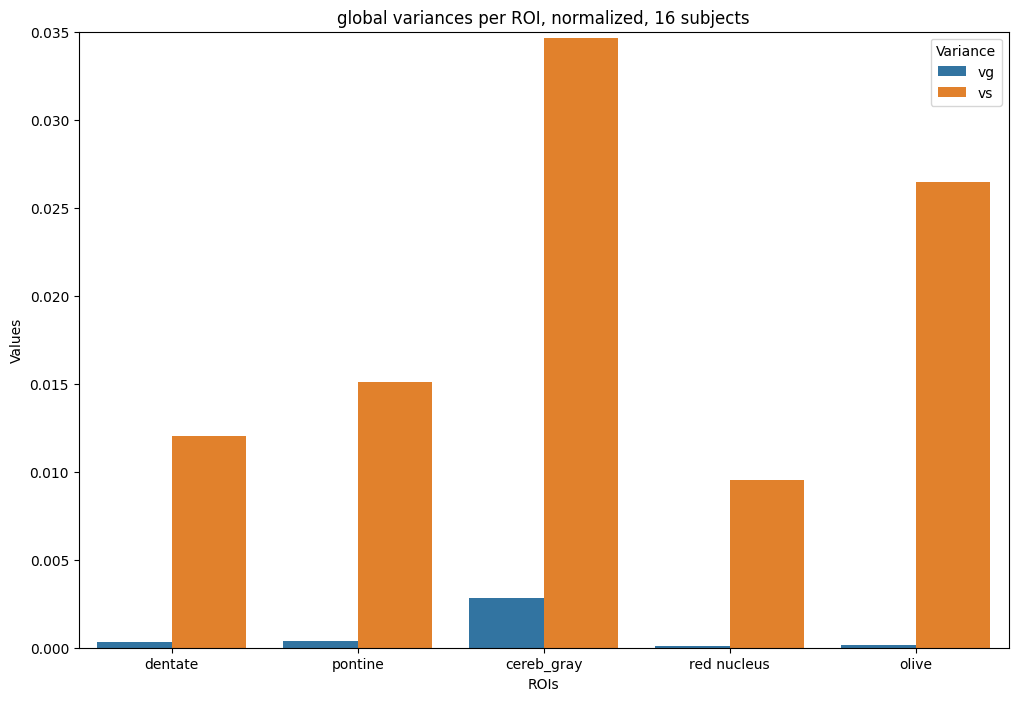

In [182]:
#plot global variances for each ROI

data = {
    'ROIs': ['dentate', 'pontine', 'cereb_gray','red nucleus', 'olive'],
    'vg_d': var_d_normalized[:, 0],
    'vs_d': var_d_normalized[:, 1],
    #'ve_d': var_d_normalized[:, 2],
    'vg_p': var_p_normalized[:, 0],
    'vs_p': var_p_normalized[:, 1],
    #'ve_p': var_p_normalized[:, 2],
    'vg_c': var_c_normalized[:, 0],
    'vs_c': var_c_normalized[:, 1],
    #'ve_c': var_c_normalized[:, 2],
    'vg_r': var_r_normalized[:, 0],
    'vs_r': var_r_normalized[:, 1],
    #'ve_r': var_r_normalized[:, 2],
    'vg_o': var_o_normalized[:, 0],
    'vs_o': var_o_normalized[:, 1],
    #'ve_o': var_o_normalized[:, 2],
}

# check array lengths:
print(var_d_normalized.shape)
print(var_p_normalized.shape)
print(var_c_normalized.shape)
print(var_r_normalized.shape)
print(var_o_normalized.shape)


# Reshape the data into long format
df_long = pandas.DataFrame({
    'ROIs': [roi for roi in data['ROIs'] for _ in range(2)],
    'Variance': (['vg'] * len(data['vg_d']) + ['vs'] * len(data['vs_d'])) * len(data['ROIs']),
  #  'Variance': (['ve'] * len(data['ve_d'])) * len(data['ROIs']),
    'Value': [value for values in [data['vg_d'], data['vs_d'],  
                                   data['vg_p'], data['vs_p'],
                                   data['vg_c'], data['vs_c'],
                                   data['vg_r'], data['vs_r'], 
                                   data['vg_o'], data['vs_o']] for value in values],
})

# seaborn process
plt.figure(figsize=(12, 8))
sns.barplot(x='ROIs', y='Value', hue='Variance', data=df_long)
plt.xlabel('ROIs')
plt.ylabel('Values')
plt.title('global variances per ROI, normalized, 16 subjects')
plt.legend(title='Variance', loc='upper right')
plt.ylim(top=0.035)
plt.show()

(10, 390)


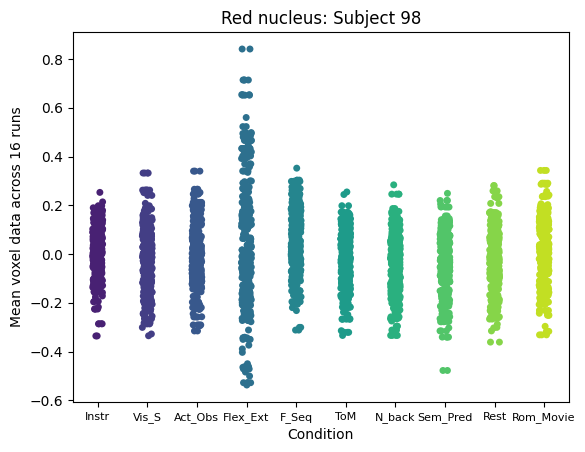

In [21]:
 #PLOT MEANS ACROSS RUNS FOR EACH CONDITION (390 data points per condition; each datapoint is the avg voxel data from 16 runs)

tensor_avg_cond = tensor_no_nans.mean(axis=1)
    
condition_labels = numpy.array(["Instr", "Vis_S", "Act_Obs", "Flex_Ext", "F_Seq", "ToM", "N_back", "Sem_Pred", "Rest", "Rom_Movie"])

data_to_plot = tensor_avg_cond[0,:,:]

df = pandas.DataFrame(data_to_plot.T, columns=condition_labels)
sns.stripplot(data=df, palette="viridis", s=5)
    
plt.xticks(fontsize=8)

plt.xlabel("Condition")
plt.ylabel("Mean voxel data across 16 runs")
plt.title("Red nucleus: Subject 98")

plt.show()


      Instr  Vis_Search   Act_Obs  Flex_Ext  Finger_Seq  Theory_of_Mind  \
0  0.000922   -0.008574 -0.000736  0.045306    0.052090       -0.029886   
1 -0.002749    0.020155 -0.015832  0.015335    0.033114        0.006142   
2  0.030191    0.045226  0.022195  0.015672    0.047661        0.032142   
3  0.004845    0.020982 -0.009141 -0.018561    0.008795       -0.001794   
4  0.027297   -0.004894  0.013458  0.067056    0.004851       -0.007996   
5  0.003517   -0.008494 -0.004753  0.018700   -0.003017        0.012189   
6  0.003086    0.009569 -0.018721 -0.008149   -0.011059        0.017029   
7  0.017014    0.037446  0.013116  0.027192    0.012569        0.026748   

     N_back  Sem_Pred      Rest  Rom_Movie Subject  
0 -0.020372 -0.046579 -0.030108   0.015920    S_98  
1 -0.000576  0.007345 -0.013499  -0.005535    S_97  
2  0.036126  0.037163  0.021191   0.016263    S_96  
3  0.020478  0.024522  0.000546  -0.027593    S_95  
4  0.015585 -0.012288  0.011247  -0.016556     S_1  
5  0.0

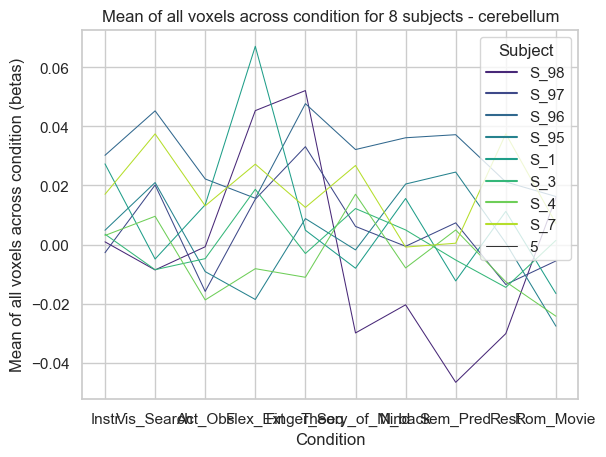

global variances: [[0.00016392        nan        nan]]


/Users/incehusain/Documents/GitHub/Functional_Fusion/Functional_Fusion/dataset.py:480: RuntimeWarning: Mean of empty slice
  SS_2 = np.nanmean(YY[:,same_subj & ~same_part],axis=1)


In [29]:
#PLOT MEANS OF ALL VOXELS IN EACH CONDITION (8 data points per condition)

tensor_avg_cond = tensor_no_nans.mean(axis=1)

condition_labels = numpy.array(["Instr", "Vis_Search", "Act_Obs", "Flex_Ext", "Finger_Seq", "Theory_of_Mind", "N_back", "Sem_Pred", "Rest", "Rom_Movie"])
subject_labels = numpy.array(['S_98', 'S_97', 'S_96', 'S_95', 'S_1', 'S_3', 'S_4', 'S_7'])
    
mean_data_per_subject = numpy.mean(tensor_avg_cond, axis=2)

df = pandas.DataFrame(mean_data_per_subject) 
df.columns = condition_labels

df['Subject'] = numpy.repeat(subject_labels, df.shape[0] // len(subject_labels))[:df.shape[0]]

print(df)
    
sns.lineplot(x='variable', y='value', hue='Subject', data=df.melt(id_vars='Subject'), palette='viridis', size=5)

plt.xlabel("Condition")
plt.ylabel("Mean of all voxels across condition (betas)")
plt.title("Mean of all voxels across condition for 8 subjects - cerebellum")

plt.show()

tensor_avg_cond_dim = tensor_no_nans.mean(axis=1, keepdims=1)
variances= decompose_pattern_into_group_indiv_noise(tensor_avg_cond_dim, criterion='global')

print("global variances:", variances)

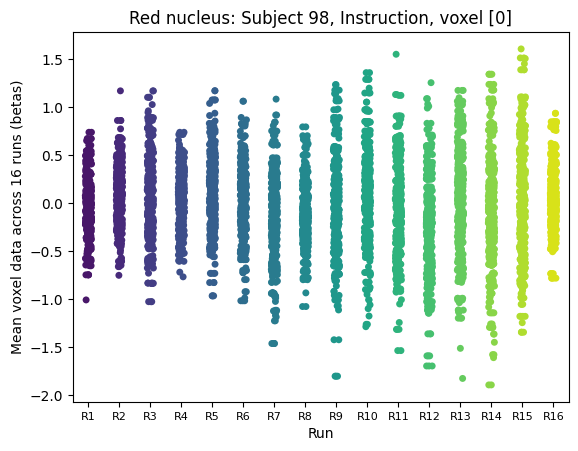

In [128]:
 #PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED (390 datapoints per run, each datapoint is data from a voxel )

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[0,:,5,:]

df = pandas.DataFrame(data_to_plot.T, columns=run_labels)
sns.stripplot(data=df, palette="viridis", s=5)

plt.xticks(fontsize=8)
plt.xlabel("Run")
plt.ylabel("Mean voxel data across 16 runs (betas)")
plt.title("Red nucleus: Subject 98, Instruction, voxel [0]")

plt.show()


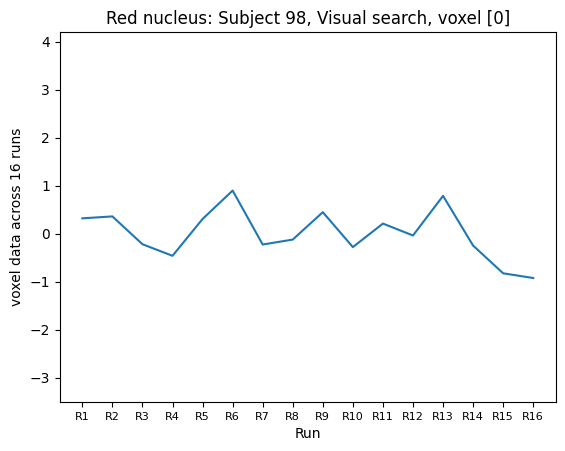

In [147]:
#PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED, 1 voxel (1 datapoints per run, each datapoint is data from a single voxel)

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[1,:,9,189]

df = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot})

plt.xticks(fontsize=8)
sns.lineplot(x='Run', y='Data', data=df).set(ylim=(-3.5,4.2))
plt.xlabel("Run")
plt.ylabel("voxel data across 16 runs")
plt.title("Red nucleus: Subject 98, Visual search, voxel [0]")

plt.show()

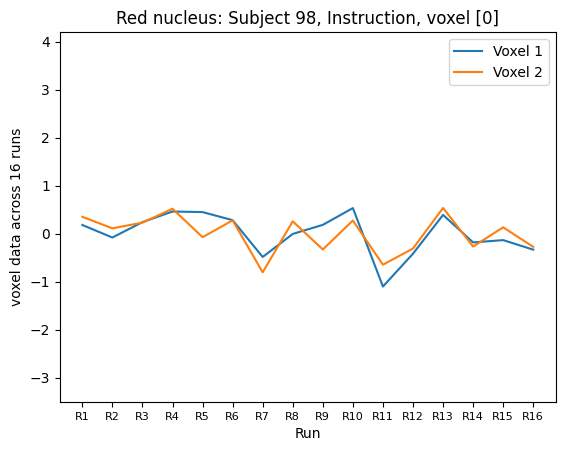

In [149]:
#PLOTTING RUNS PER CONDITION WITH MEAN SUBTRACTED, >1 voxel (1 datapoints per run, each datapoint is data from a single voxel)

tensor_avg_cond = tensor_no_nans.mean(axis=1, keepdims=True)

tensor_subtract = tensor_no_nans - tensor_avg_cond

run_labels = numpy.array(["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10", "R11", "R12", "R13", "R14", "R15", "R16"])
data_to_plot = tensor_subtract[0,:,0,4]
data_to_plot2 = tensor_subtract[0,:,1,4]

df = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot})
df2 = pandas.DataFrame({'Run': run_labels, 'Data': data_to_plot2})

plt.xticks(fontsize=8)
sns.lineplot(x='Run', y='Data', data=df, label = 'Voxel 1').set(ylim=(-3.5,4.2))
sns.lineplot(x='Run', y='Data', data=df2, label='Voxel 2')
plt.xlabel("Run")
plt.ylabel("voxel data across 16 runs")
plt.title("Red nucleus: Subject 98, Instruction, voxel [0]")

plt.show()

#INSIGHTS:
#voxels 3 and 4 are either two voxels with identical activity or they are the same voxel: activity is exactly the same across all conditions + runs

In [ ]:
#TO FIND LOCATION OF SMALLEST or LARGEST value: 
#numpy.unravel_index(numpy.argmax(tensor_subtract[:,:,:,:]), tensor_subtract.shape)


In [116]:
from scripts import bold_normalization

src = '/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/regdef/group/cereb_gray_mask.nii'
outname = '/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/regdef/group/symm_cereb_gray_mask.nii'

bold_normalization.symmetrize_image(src,outname)

In [117]:
#set mask voxels to 1s or 0s

import nibabel as nb
import numpy as np

def binarize_mask(src, outname):
    # Load the mask image
    mask_img = nb.load(src)
    
    # Get the data from the image
    mask_data = mask_img.get_fdata()
    
    # Set all non-zero values to 1
    mask_data[mask_data > 0] = 1
    
    # Create a new NIfTI image with the updated data
    new_mask_img = nb.Nifti1Image(mask_data, mask_img.affine)
    
    # Save the new mask
    nb.save(new_mask_img, outname)
    
    return new_mask_img

src = '/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/regdef/group/symm_cereb_gray_mask.nii'  # Path to your mask image
outname = '/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/regdef/group/binary_cereb_gray_mask.nii'  # Path to save the new binary mask

# Call the function to make all mask values 1
binarize_mask(src, outname)




In [47]:
#set Qform and Sform matrices equal

import nibabel as nb

# Load the NIfTI image
img = nb.load('/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/imaging_data/S97/S97_mean_bold.nii')

# Get the header from the image
header = img.header

# Get the S-form matrix from the header
sform = img.get_sform()

# Set the Q-form matrix to be equal to the S-form matrix
header.set_qform(sform, code=1)  # Set Q-form code to 1 (for aligned)

# Create a new NIfTI image with the updated header
new_img = nb.Nifti1Image(img.get_fdata(), img.affine, header=header)

# Save the new image with updated Q-form
nb.save(new_img, '/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/imaging_data/S08/S97_mean_bold_eq.nii')

print("Q-form and S-form matrices have been made equal and saved.")


Q-form and S-form matrices have been made equal and saved.


In [32]:
dentate = nb.load("/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/regdef/group/pontine_mask.nii")
data = dentate.get_fdata()

non_zero_voxels = np.argwhere(data>0)

len(non_zero_voxels)

8162

In [105]:
#in dentate, average tasks for LH only across subjects 

#dentate data

flat_data = decomposing_variances.get_structure_data(structure='dentate', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

#data without nans, to be manipualted henceforth: 

tensor_no_nans = numpy.nan_to_num(tensor_4d)


 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subt = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subt).any()


if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print("shape of data:", flat_data.shape)
print("subtract avg of all voxels:", tensor_mean_subt.shape)

#isolating left hand only runs for a selected task 

left_hand_tensor = tensor_mean_subt[:, 4:12, 7:8, :]  #this selects a task (axis 2) for runs 5 through 12 (4:12)

print("left hand shape:", left_hand_tensor.shape)

#averaging the selected task for left hand for each subject

left_hand_tensor_subj_avg = numpy.mean(left_hand_tensor, axis=1, keepdims=True)

print("left hand avg tensor shape:", left_hand_tensor_subj_avg.shape)

#averaging the selected task for left hand across subjects 

left_hand_tensor_group_avg = numpy.mean(left_hand_tensor_subj_avg, axis=0, keepdims = True)

print("left hand finger sequence data averaged across subjects:", left_hand_tensor_group_avg.shape)

###saving the group map of left hand finger sequence data as a new dscalar file

left_hand_group_reshape = left_hand_tensor_group_avg.reshape(1,3148)

#creating an array with shape (160,3148) to match the header of previous cifti files, and fill first row with new data 

LH_group_array = numpy.zeros((160,3148)) 

LH_group_array[7,:] = left_hand_group_reshape

#saving as new cifti image 

ref_img = nb.load("/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/group_avg/ref.dscalar.nii")

new_img = nb.cifti2.Cifti2Image(dataobj=LH_group_array, header=ref_img.header)

nb.save (new_img, '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/group_avg/dentate_LH_FlexExt.dscalar.nii')


#dentate_S08 = nb.load("/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group/beta_glm2_dentate_S08.dscalar.nii")


vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
v

tensor_subtract does not contain NaN values.
shape of data: (15, 160, 3148)
subtract avg of all voxels: (15, 16, 10, 3148)
left hand shape: (15, 8, 1, 3148)
left hand avg tensor shape: (15, 1, 1, 3148)
left hand finger sequence data averaged across subjects: (1, 1, 1, 3148)


In [85]:
dentate_S08 = nb.load("/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group/beta_glm2_dentate_S08.dscalar.nii")

dentate_S08.header

vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value


In [104]:
#in dentate, average tasks for RH for each subject

#dentate data

flat_data = decomposing_variances.get_structure_data(structure='dentate', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

#data without nans, to be manipualted henceforth: 

tensor_no_nans = numpy.nan_to_num(tensor_4d)


 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

tensor_mean_subt = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(tensor_mean_subt).any()


if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print("shape of data:", flat_data.shape)
print("subtract avg of all voxels:", tensor_mean_subt.shape)

#isolating a right hand-only task 

right_hand_tensor = tensor_mean_subt[:, numpy.r_[0:4, 12:16], 7:8, :]  #this selects a task (axis 2) for runs 1-4, 13-16 (right hand) 

print("right hand shape:", right_hand_tensor.shape)

#averaging the selected task data for right hand for each subject

right_hand_tensor_subj_avg = numpy.mean(right_hand_tensor, axis=1, keepdims=True)

print("right hand avg tensor shape:", right_hand_tensor_subj_avg.shape)

#averaging the selected data for left hand across subjects 

right_hand_tensor_group_avg = numpy.mean(right_hand_tensor_subj_avg, axis=0, keepdims = True)

print("left hand finger sequence data averaged across subjects:", right_hand_tensor_group_avg.shape)

###saving the group map of the selected task as a new dscalar file

right_hand_group_reshape = right_hand_tensor_group_avg.reshape(1,3148)

#creating an array with shape (160,3148) to match the header of previous cifti files, and fill first row with new data 

RH_group_array = numpy.zeros((160,3148)) 

RH_group_array[7,:] = right_hand_group_reshape

#saving as new cifti image 

ref_img = nb.load("/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/group_avg/ref.dscalar.nii")

new_img = nb.cifti2.Cifti2Image(dataobj=RH_group_array, header=ref_img.header)

nb.save (new_img, '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/group_avg/dentate_RH_FlexExt.dscalar.nii')


#dentate_S08 = nb.load("/Volumes/Diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group/beta_glm2_dentate_S08.dscalar.nii")


vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
v

tensor_subtract does not contain NaN values.
shape of data: (15, 160, 3148)
subtract avg of all voxels: (15, 16, 10, 3148)
right hand shape: (15, 8, 1, 3148)
right hand avg tensor shape: (15, 1, 1, 3148)
left hand finger sequence data averaged across subjects: (1, 1, 1, 3148)


In [273]:
#dentate data SUIT

flat_data = decomposing_variances.get_structure_data(structure='rednucleus', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_SUIT/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

    #removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_d = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_d.shape)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

SUIT_tensor_mean_subtract_d = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(SUIT_tensor_mean_subtract_d).any()

 #removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_d = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_d.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_d = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_d.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(SUIT_tensor_mean_subtract_d.shape)

vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=21592) not divisible by 16, not SPM compatible; leaving at current value
v

(16, 16, 9, 390)
tensor_subtract does not contain NaN values.
(16, 160, 390)
(16, 16, 10, 390)


In [274]:
#dentate data BOLD

flat_data = decomposing_variances.get_structure_data(structure='rednucleus', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

tensor_no_nans = numpy.nan_to_num(tensor_4d)

    #removing instruction 

tensor_no_inst = numpy.delete(tensor_no_nans, 0, axis=2)

tensor_avg_no_inst = tensor_no_inst.mean(axis=3, keepdims=1)

tensor_mean_subtr_no_inst_d = tensor_no_inst - tensor_avg_no_inst

print(tensor_mean_subtr_no_inst_d.shape)

 #removing avg of all voxels + check to ensure no nans

tensor_avg_cond = tensor_no_nans.mean(axis=3, keepdims=1) #this is the mean activity pattern 

BOLD_tensor_mean_subtract_d = tensor_no_nans - tensor_avg_cond

has_nans = numpy.isnan(BOLD_tensor_mean_subtract_d).any()

 #removing subjects 97, 3, and 7. 

#tensor_no_s97_s3_s7 = numpy.delete(tensor_no_nans, [0, 5, 7], axis=0)

#tensor_avg_del_subj = tensor_no_s97_s3_s7.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_d = tensor_no_s97_s3_s7 - tensor_avg_del_subj

#print(tensor_mean_subtr_with_del_subj_d.shape)

#removing instruction and subjects 97, 3, and 7

#tensor_no_s97_s3_s7_no_inst = numpy.delete(tensor_no_s97_s3_s7, 0, axis=2)

#tensor_avg_del_subj_inst = tensor_no_s97_s3_s7_no_inst.mean(axis=3, keepdims=1)

#tensor_mean_subtr_with_del_subj_inst_d = tensor_no_s97_s3_s7_no_inst - tensor_avg_del_subj_inst

#print(tensor_mean_subtr_with_del_subj_inst_d.shape)

if has_nans:
    print("tensor_subtract contains NaN values.")
else:
    print("tensor_subtract does not contain NaN values.")

print(flat_data.shape)
print(BOLD_tensor_mean_subtract_d.shape)

vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=29800) not divisible by 16, not SPM compatible; leaving at current value
v

(16, 16, 9, 1250)
tensor_subtract does not contain NaN values.
(16, 160, 1250)
(16, 16, 10, 1250)


In [281]:
# Example arrays representing variances for each subject

#options are: global, subject_wise, condition_wise

variances_d_bold= decompose_pattern_into_group_indiv_noise(BOLD_tensor_mean_subtract_d, criterion='condition_wise')
variances_d_suit= decompose_pattern_into_group_indiv_noise(SUIT_tensor_mean_subtract_d, criterion='condition_wise')



In [283]:
import pandas as pd

# Assuming variances_d, variances_p, variances_o, variances_r are defined

var_d_bold_norm = numpy.zeros((10,3)) #(10,3) means 10 rows, 3 variances; (1,3) means 1 row, 3 variances, etc 
var_d_suit_norm = numpy.zeros((10,3))


for i in range(10): #number of rows 
    row_sum_d = numpy.sum(variances_d_bold[i])
    var_d_bold_norm[i] = variances_d_bold[i]/row_sum_d

    row_sum_d2 = numpy.sum(variances_d_suit[i])
    var_d_suit_norm[i] = variances_d_suit[i]/row_sum_d2

print(var_d_bold_norm[0][0] + var_d_bold_norm[0][1] + var_d_bold_norm[0][2])

print(var_d_bold_norm.shape)


1.0
(10, 3)


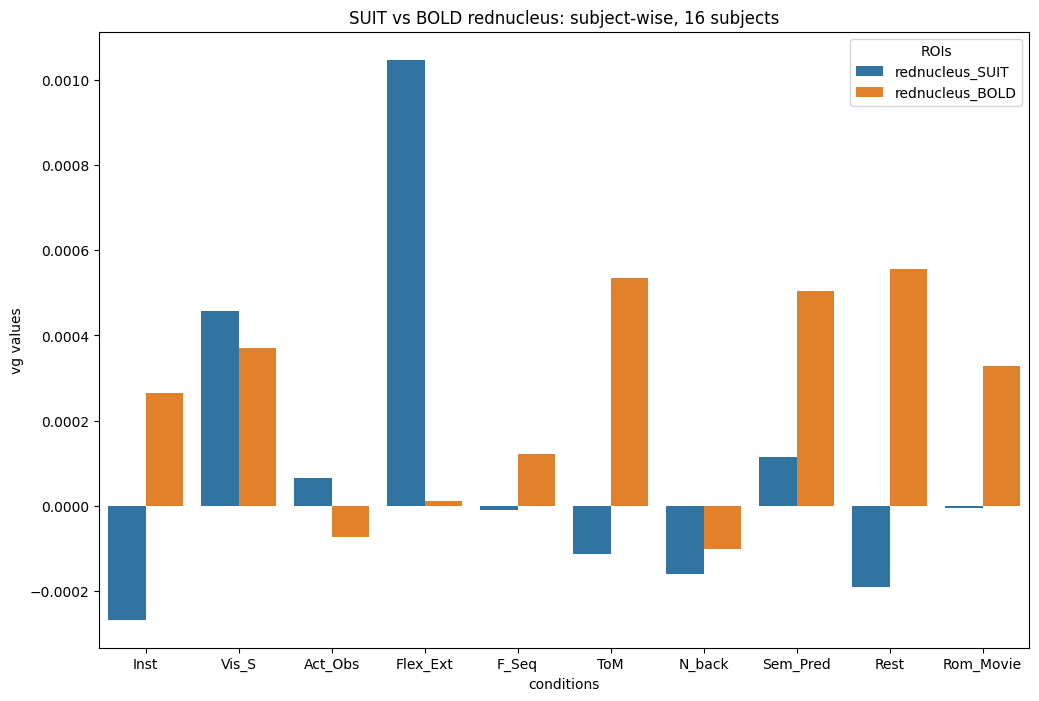

In [285]:
# plot variances per roi (each variance separately: vg (0), vs (1), ve(2)), mean subtracted, for condition or for subject 
data = {
   # 'Subjects': ['S98', 'S97', 'S96', 'S95', 'S01', 'S03','S04','S07','S08','S10', 'S11', 'S12', 'S13', 'S14', 'S16', 'S17'],
    'conditions': ["Inst", "Vis_S", "Act_Obs", "Flex_Ext", "F_Seq", "ToM", "N_back", "Sem_Pred", "Rest", "Rom_Movie"],
    'rednucleus_SUIT': var_d_suit_norm[:,0],
    'rednucleus_BOLD': var_d_bold_norm[:,0],
}


df = pandas.DataFrame(data)

#seaborn process 
df_melted = pandas.melt(df, id_vars=['conditions'], var_name='Variance', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='conditions', y='Value', hue='Variance', data=df_melted)
plt.xlabel('conditions')
plt.ylabel('vg values')
plt.title('SUIT vs BOLD rednucleus: subject-wise, 16 subjects')
plt.legend(title='ROIs', loc='upper right')
plt.show()

In [311]:
#checking number of nans in data


flat_data = decomposing_variances.get_structure_data(structure='dentate', data_dir='/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group_smoothed/smoothed_with_nans')

cond_vec = numpy.tile(numpy.arange(1,11),16)

part_vec = numpy.repeat(numpy.arange(1,17), 10)

tensor_4d = decomposing_variances.flat2ndarray(flat_data, cond_vec, part_vec)

nan_count = numpy.isnan(tensor_4d).sum()

zero_count = numpy.count_nonzero(tensor_4d == 0)

print(f"Number of NaN values: {nan_count}")
print(f"Number of zero values: {zero_count}")




Number of NaN values: 444000
Number of zero values: 0


In [306]:
#replace nans with zeros in .dscalar.nii files 

import numpy as np

T = pandas.read_csv('/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/participants.tsv', sep='\t')

data_dir = "/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group_smoothed"

for i, good_value in zip(T.participant_id, T.good):
      if good_value==1:
        file_path = f'{data_dir}/beta_glm2_dentate_{i}.dscalar.nii'
        subj = nb.load(file_path)
        subj_data = subj.get_fdata()
        nan_count = np.isnan(subj_data)
      #  print(f"Number of NaN values: {nan_count}")
        subj_data[np.isnan(subj_data)] = 0
        subj_no_nan = nb.Cifti2Image(subj_data, header=subj.header, nifti_header=subj.nifti_header)
        subj_no_nan_file = f'{data_dir}/beta_glm2_dentate_{i}.dscalar.nii'
        nb.save(subj_no_nan, subj_no_nan_file)


#I can later find where the NaNs were by comparing each file here to the unaltered one and spitting out the locations where the values don't match 

vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
v

In [313]:
#checking whether .dscalar.nii files are the same or not (to check if different smoothing techniques etc worked)

import nibabel as nb
import numpy as np

T = pandas.read_csv('/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/participants.tsv', sep='\t')

data_dir1 = "/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group_smoothed"

data_dir2 = "/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLD/data/group_smoothed/smoothed_zerosForNans"

for i, good_value in zip(T.participant_id, T.good):
      if good_value==1:
        file1_path = f'{data_dir1}/beta_glm2_dentate_{i}.dscalar.nii'
        file1 = nb.load(file1_path)
        data1 = file1.get_fdata()

        file2_path = f'{data_dir2}/beta_glm2_dentate_{i}.dscalar.nii'
        file2 = nb.load(file2_path)
        data2 = file2.get_fdata()

        if np.array_equal(data1, data2):
            print("SAME")
        else:
            print("DIFF")




SAME
SAME
SAME
DIFF
SAME
SAME
DIFF
SAME
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
DIFF
SAME


In [3]:
from scripts import decomposing_variances

contrast, contrast_names = decomposing_variances.make_contrast_vectors()

print(contrast)

print(contrast_names)

[[ 1.         -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.          0.88888889 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111  0.88888889 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111 -0.11111111  0.88888889 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111 -0.11111111 -0.11111111  0.88888889 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111 -0.11111111 -0.11111111 -0.11111111  0.88888889
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
   0.88888889 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111  0.88888889 -0.11111111 -0.11111111]


In [4]:
decomposing_variances.group_analysis(contrast,contrast_names)

vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
/Users/incehusain/Documents/GitHub/Pontine7T/env/lib/python3.9/site-packages/nibabel/nifti1.py:617: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=47896) not divisible by 16, not SPM compatible; leaving at current value
